In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

C:\Users\Coco\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.10.0


In [25]:
NUM_WORDS = 10000
# load_data(num_words), 表示词索引最大值，这里表示前10000-1的索引
# 此数据集是经过预处理后的，每一条评论表示词索引的一个序列，安装词频率排序后的索引
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    # np.zero(shape), len() * dimension的一个矩阵, 数据类型是float
    # len(sequences)表示评论的条数
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [12]:
# (train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=5)

In [24]:
# r = np.zeros((2, 10))
# for i, word_indices in enumerate([[np.random.randint(10, size=10)], [np.random.randint(5, size=10)]]):
#     print("r:{}".format(r[i, word_indices]))
#     r[i, word_indices] = 1
#     print('i:{}, word:{}'.format(i, word_indices))
#     print(("r 2:{}".format(r[i, word_indices])))
    

r:[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
i:0, word:[array([2, 4, 0, 6, 2, 4, 1, 9, 5, 8])]
r 2:[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
r:[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
i:1, word:[array([2, 1, 1, 0, 3, 3, 1, 2, 3, 0])]
r 2:[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


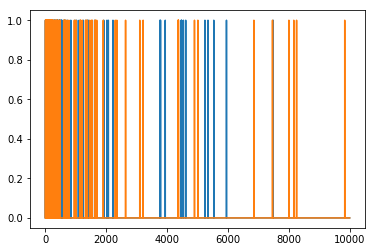

In [26]:
plt.plot(train_data[0])
plt.plot(train_data[1])
# x轴表示词索引
# y轴表示编码为1的词索引

In [28]:
# create a baseline model
baseline_model = keras.Sequential([keras.layers.Dense(16, activation=tf.nn.relu,
                                                input_shape=(NUM_WORDS,)),
                             keras.layers.Dense(16, activation=tf.nn.relu),
                             keras.layers.Dense(1, activation=tf.nn.sigmoid)])
baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [29]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20


 - 7s - loss: 0.4665 - acc: 0.8166 - binary_crossentropy: 0.4665 - val_loss: 0.3326 - val_acc: 0.8762 - val_binary_crossentropy: 0.3326


Epoch 2/20


 - 7s - loss: 0.2461 - acc: 0.9120 - binary_crossentropy: 0.2461 - val_loss: 0.2857 - val_acc: 0.8873 - val_binary_crossentropy: 0.2857


Epoch 3/20


 - 4s - loss: 0.1826 - acc: 0.9367 - binary_crossentropy: 0.1826 - val_loss: 0.2896 - val_acc: 0.8848 - val_binary_crossentropy: 0.2896


Epoch 4/20


 - 4s - loss: 0.1470 - acc: 0.9498 - binary_crossentropy: 0.1470 - val_loss: 0.3143 - val_acc: 0.8785 - val_binary_crossentropy: 0.3143


Epoch 5/20


 - 4s - loss: 0.1226 - acc: 0.9591 - binary_crossentropy: 0.1226 - val_loss: 0.3390 - val_acc: 0.8739 - val_binary_crossentropy: 0.3390


Epoch 6/20


 - 4s - loss: 0.1024 - acc: 0.9684 - binary_crossentropy: 0.1024 - val_loss: 0.3689 - val_acc: 0.8697 - val_binary_crossentropy: 0.3689


Epoch 7/20


 - 4s - loss: 0.0859 - acc: 0.9748 - binary_crossentropy: 0.0859 - val_loss: 0.4192 - val_acc: 0.8616 - val_binary_crossentropy: 0.4192


Epoch 8/20


 - 4s - loss: 0.0716 - acc: 0.9797 - binary_crossentropy: 0.0716 - val_loss: 0.4462 - val_acc: 0.8629 - val_binary_crossentropy: 0.4462


Epoch 9/20


 - 4s - loss: 0.0574 - acc: 0.9857 - binary_crossentropy: 0.0574 - val_loss: 0.4867 - val_acc: 0.8600 - val_binary_crossentropy: 0.4867


Epoch 10/20


 - 4s - loss: 0.0443 - acc: 0.9907 - binary_crossentropy: 0.0443 - val_loss: 0.5324 - val_acc: 0.8566 - val_binary_crossentropy: 0.5324


Epoch 11/20


 - 4s - loss: 0.0335 - acc: 0.9941 - binary_crossentropy: 0.0335 - val_loss: 0.5717 - val_acc: 0.8554 - val_binary_crossentropy: 0.5717


Epoch 12/20


 - 4s - loss: 0.0244 - acc: 0.9965 - binary_crossentropy: 0.0244 - val_loss: 0.6135 - val_acc: 0.8540 - val_binary_crossentropy: 0.6135


Epoch 13/20


 - 4s - loss: 0.0177 - acc: 0.9981 - binary_crossentropy: 0.0177 - val_loss: 0.6517 - val_acc: 0.8530 - val_binary_crossentropy: 0.6517


Epoch 14/20


 - 4s - loss: 0.0127 - acc: 0.9993 - binary_crossentropy: 0.0127 - val_loss: 0.6947 - val_acc: 0.8526 - val_binary_crossentropy: 0.6947


Epoch 15/20


 - 4s - loss: 0.0089 - acc: 0.9998 - binary_crossentropy: 0.0089 - val_loss: 0.7407 - val_acc: 0.8518 - val_binary_crossentropy: 0.7407


Epoch 16/20


 - 4s - loss: 0.0064 - acc: 0.9998 - binary_crossentropy: 0.0064 - val_loss: 0.7840 - val_acc: 0.8515 - val_binary_crossentropy: 0.7840


Epoch 17/20


 - 4s - loss: 0.0045 - acc: 1.0000 - binary_crossentropy: 0.0045 - val_loss: 0.8182 - val_acc: 0.8520 - val_binary_crossentropy: 0.8182


Epoch 18/20


 - 4s - loss: 0.0034 - acc: 1.0000 - binary_crossentropy: 0.0034 - val_loss: 0.8542 - val_acc: 0.8516 - val_binary_crossentropy: 0.8542


Epoch 19/20


 - 4s - loss: 0.0027 - acc: 1.0000 - binary_crossentropy: 0.0027 - val_loss: 0.8804 - val_acc: 0.8518 - val_binary_crossentropy: 0.8804


Epoch 20/20


 - 4s - loss: 0.0021 - acc: 1.0000 - binary_crossentropy: 0.0021 - val_loss: 0.9104 - val_acc: 0.8514 - val_binary_crossentropy: 0.9104


In [30]:
# create a smaller model
smaller_model = keras.Sequential([keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
                                  keras.layers.Dense(4, activation=tf.nn.relu),
                                  keras.layers.Dense(1, activation=tf.nn.sigmoid)])
smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [31]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20


 - 5s - loss: 0.5615 - acc: 0.7622 - binary_crossentropy: 0.5615 - val_loss: 0.4507 - val_acc: 0.8532 - val_binary_crossentropy: 0.4507


Epoch 2/20


 - 4s - loss: 0.3634 - acc: 0.8862 - binary_crossentropy: 0.3634 - val_loss: 0.3510 - val_acc: 0.8774 - val_binary_crossentropy: 0.3510


Epoch 3/20


 - 4s - loss: 0.2793 - acc: 0.9078 - binary_crossentropy: 0.2793 - val_loss: 0.3094 - val_acc: 0.8856 - val_binary_crossentropy: 0.3094


Epoch 4/20


 - 4s - loss: 0.2324 - acc: 0.9235 - binary_crossentropy: 0.2324 - val_loss: 0.2924 - val_acc: 0.8867 - val_binary_crossentropy: 0.2924


Epoch 5/20


 - 4s - loss: 0.2015 - acc: 0.9340 - binary_crossentropy: 0.2015 - val_loss: 0.2870 - val_acc: 0.8854 - val_binary_crossentropy: 0.2870


Epoch 6/20


 - 4s - loss: 0.1783 - acc: 0.9419 - binary_crossentropy: 0.1783 - val_loss: 0.2846 - val_acc: 0.8866 - val_binary_crossentropy: 0.2846


Epoch 7/20


 - 4s - loss: 0.1599 - acc: 0.9491 - binary_crossentropy: 0.1599 - val_loss: 0.2883 - val_acc: 0.8847 - val_binary_crossentropy: 0.2883


Epoch 8/20


 - 4s - loss: 0.1448 - acc: 0.9540 - binary_crossentropy: 0.1448 - val_loss: 0.2953 - val_acc: 0.8834 - val_binary_crossentropy: 0.2953


Epoch 9/20


 - 4s - loss: 0.1326 - acc: 0.9574 - binary_crossentropy: 0.1326 - val_loss: 0.3040 - val_acc: 0.8814 - val_binary_crossentropy: 0.3040


Epoch 10/20


 - 4s - loss: 0.1209 - acc: 0.9627 - binary_crossentropy: 0.1209 - val_loss: 0.3170 - val_acc: 0.8774 - val_binary_crossentropy: 0.3170


Epoch 11/20


 - 4s - loss: 0.1112 - acc: 0.9666 - binary_crossentropy: 0.1112 - val_loss: 0.3262 - val_acc: 0.8773 - val_binary_crossentropy: 0.3262


Epoch 12/20


 - 4s - loss: 0.1020 - acc: 0.9697 - binary_crossentropy: 0.1020 - val_loss: 0.3421 - val_acc: 0.8738 - val_binary_crossentropy: 0.3421


Epoch 13/20


 - 4s - loss: 0.0938 - acc: 0.9730 - binary_crossentropy: 0.0938 - val_loss: 0.3528 - val_acc: 0.8724 - val_binary_crossentropy: 0.3528


Epoch 14/20


 - 4s - loss: 0.0867 - acc: 0.9758 - binary_crossentropy: 0.0867 - val_loss: 0.3684 - val_acc: 0.8710 - val_binary_crossentropy: 0.3684


Epoch 15/20


 - 4s - loss: 0.0797 - acc: 0.9790 - binary_crossentropy: 0.0797 - val_loss: 0.3834 - val_acc: 0.8702 - val_binary_crossentropy: 0.3834


Epoch 16/20


 - 4s - loss: 0.0734 - acc: 0.9815 - binary_crossentropy: 0.0734 - val_loss: 0.4002 - val_acc: 0.8689 - val_binary_crossentropy: 0.4002


Epoch 17/20


 - 4s - loss: 0.0677 - acc: 0.9836 - binary_crossentropy: 0.0677 - val_loss: 0.4192 - val_acc: 0.8653 - val_binary_crossentropy: 0.4192


Epoch 18/20


 - 4s - loss: 0.0621 - acc: 0.9860 - binary_crossentropy: 0.0621 - val_loss: 0.4413 - val_acc: 0.8634 - val_binary_crossentropy: 0.4413


Epoch 19/20


 - 4s - loss: 0.0570 - acc: 0.9882 - binary_crossentropy: 0.0570 - val_loss: 0.4554 - val_acc: 0.8629 - val_binary_crossentropy: 0.4554


Epoch 20/20


 - 4s - loss: 0.0522 - acc: 0.9896 - binary_crossentropy: 0.0522 - val_loss: 0.4757 - val_acc: 0.8609 - val_binary_crossentropy: 0.4757


In [32]:
# create a bigger model
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [33]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20


 - 15s - loss: 0.3429 - acc: 0.8540 - binary_crossentropy: 0.3429 - val_loss: 0.2941 - val_acc: 0.8794 - val_binary_crossentropy: 0.2941


Epoch 2/20


 - 13s - loss: 0.1356 - acc: 0.9506 - binary_crossentropy: 0.1356 - val_loss: 0.3642 - val_acc: 0.8613 - val_binary_crossentropy: 0.3642


Epoch 3/20


 - 14s - loss: 0.0422 - acc: 0.9880 - binary_crossentropy: 0.0422 - val_loss: 0.4378 - val_acc: 0.8688 - val_binary_crossentropy: 0.4378


Epoch 4/20


 - 14s - loss: 0.0071 - acc: 0.9989 - binary_crossentropy: 0.0071 - val_loss: 0.5996 - val_acc: 0.8704 - val_binary_crossentropy: 0.5996


Epoch 5/20


 - 14s - loss: 8.1983e-04 - acc: 1.0000 - binary_crossentropy: 8.1983e-04 - val_loss: 0.6901 - val_acc: 0.8717 - val_binary_crossentropy: 0.6901


Epoch 6/20


 - 13s - loss: 2.2401e-04 - acc: 1.0000 - binary_crossentropy: 2.2401e-04 - val_loss: 0.7299 - val_acc: 0.8720 - val_binary_crossentropy: 0.7299


Epoch 7/20


 - 13s - loss: 1.2902e-04 - acc: 1.0000 - binary_crossentropy: 1.2902e-04 - val_loss: 0.7567 - val_acc: 0.8720 - val_binary_crossentropy: 0.7567


Epoch 8/20


 - 14s - loss: 9.0669e-05 - acc: 1.0000 - binary_crossentropy: 9.0669e-05 - val_loss: 0.7779 - val_acc: 0.8720 - val_binary_crossentropy: 0.7779


Epoch 9/20


 - 13s - loss: 6.7957e-05 - acc: 1.0000 - binary_crossentropy: 6.7957e-05 - val_loss: 0.7960 - val_acc: 0.8721 - val_binary_crossentropy: 0.7960


Epoch 10/20


 - 12s - loss: 5.2784e-05 - acc: 1.0000 - binary_crossentropy: 5.2784e-05 - val_loss: 0.8113 - val_acc: 0.8721 - val_binary_crossentropy: 0.8113


Epoch 11/20


 - 13s - loss: 4.1904e-05 - acc: 1.0000 - binary_crossentropy: 4.1904e-05 - val_loss: 0.8261 - val_acc: 0.8720 - val_binary_crossentropy: 0.8261


Epoch 12/20


 - 13s - loss: 3.3806e-05 - acc: 1.0000 - binary_crossentropy: 3.3806e-05 - val_loss: 0.8393 - val_acc: 0.8721 - val_binary_crossentropy: 0.8393


Epoch 13/20


 - 14s - loss: 2.7693e-05 - acc: 1.0000 - binary_crossentropy: 2.7693e-05 - val_loss: 0.8518 - val_acc: 0.8719 - val_binary_crossentropy: 0.8518


Epoch 14/20


 - 14s - loss: 2.2953e-05 - acc: 1.0000 - binary_crossentropy: 2.2953e-05 - val_loss: 0.8637 - val_acc: 0.8720 - val_binary_crossentropy: 0.8637


Epoch 15/20


 - 14s - loss: 1.9211e-05 - acc: 1.0000 - binary_crossentropy: 1.9211e-05 - val_loss: 0.8750 - val_acc: 0.8720 - val_binary_crossentropy: 0.8750


Epoch 16/20


 - 14s - loss: 1.6238e-05 - acc: 1.0000 - binary_crossentropy: 1.6238e-05 - val_loss: 0.8845 - val_acc: 0.8720 - val_binary_crossentropy: 0.8845


Epoch 17/20


 - 14s - loss: 1.3834e-05 - acc: 1.0000 - binary_crossentropy: 1.3834e-05 - val_loss: 0.8958 - val_acc: 0.8715 - val_binary_crossentropy: 0.8958


Epoch 18/20


 - 13s - loss: 1.1915e-05 - acc: 1.0000 - binary_crossentropy: 1.1915e-05 - val_loss: 0.9043 - val_acc: 0.8717 - val_binary_crossentropy: 0.9043


Epoch 19/20


 - 14s - loss: 1.0297e-05 - acc: 1.0000 - binary_crossentropy: 1.0297e-05 - val_loss: 0.9130 - val_acc: 0.8716 - val_binary_crossentropy: 0.9130


Epoch 20/20


 - 14s - loss: 8.9857e-06 - acc: 1.0000 - binary_crossentropy: 8.9857e-06 - val_loss: 0.9218 - val_acc: 0.8715 - val_binary_crossentropy: 0.9218


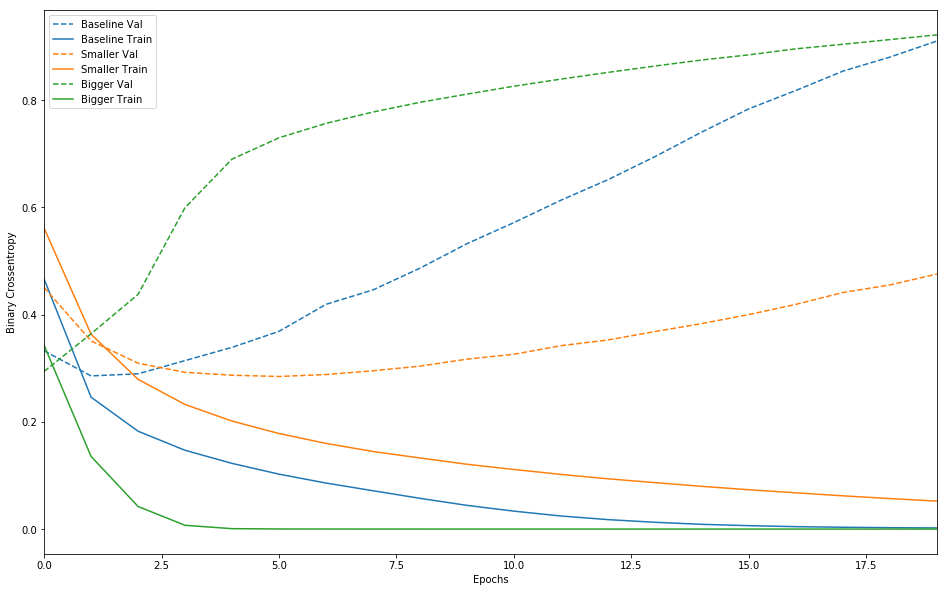

In [35]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
  # string.title() 变成大写
  # history类属性
  # plt.plot()返回值属性
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0, max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [36]:
# # strategies
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20


 - 7s - loss: 0.5609 - acc: 0.7795 - binary_crossentropy: 0.5222 - val_loss: 0.4148 - val_acc: 0.8722 - val_binary_crossentropy: 0.3733


Epoch 2/20


 - 5s - loss: 0.3287 - acc: 0.9032 - binary_crossentropy: 0.2815 - val_loss: 0.3411 - val_acc: 0.8867 - val_binary_crossentropy: 0.2898


Epoch 3/20


 - 4s - loss: 0.2686 - acc: 0.9232 - binary_crossentropy: 0.2146 - val_loss: 0.3386 - val_acc: 0.8876 - val_binary_crossentropy: 0.2828


Epoch 4/20


 - 4s - loss: 0.2412 - acc: 0.9369 - binary_crossentropy: 0.1839 - val_loss: 0.3478 - val_acc: 0.8841 - val_binary_crossentropy: 0.2897


Epoch 5/20


 - 4s - loss: 0.2269 - acc: 0.9425 - binary_crossentropy: 0.1673 - val_loss: 0.3599 - val_acc: 0.8800 - val_binary_crossentropy: 0.2995


Epoch 6/20


 - 4s - loss: 0.2134 - acc: 0.9484 - binary_crossentropy: 0.1525 - val_loss: 0.3723 - val_acc: 0.8776 - val_binary_crossentropy: 0.3111


Epoch 7/20


 - 4s - loss: 0.2062 - acc: 0.9512 - binary_crossentropy: 0.1440 - val_loss: 0.3864 - val_acc: 0.8733 - val_binary_crossentropy: 0.3236


Epoch 8/20


 - 4s - loss: 0.1972 - acc: 0.9548 - binary_crossentropy: 0.1336 - val_loss: 0.3955 - val_acc: 0.8729 - val_binary_crossentropy: 0.3318


Epoch 9/20


 - 4s - loss: 0.1910 - acc: 0.9565 - binary_crossentropy: 0.1269 - val_loss: 0.4119 - val_acc: 0.8700 - val_binary_crossentropy: 0.3473


Epoch 10/20


 - 4s - loss: 0.1893 - acc: 0.9580 - binary_crossentropy: 0.1240 - val_loss: 0.4298 - val_acc: 0.8668 - val_binary_crossentropy: 0.3641


Epoch 11/20


 - 4s - loss: 0.1831 - acc: 0.9602 - binary_crossentropy: 0.1169 - val_loss: 0.4354 - val_acc: 0.8666 - val_binary_crossentropy: 0.3688


Epoch 12/20


 - 4s - loss: 0.1791 - acc: 0.9622 - binary_crossentropy: 0.1125 - val_loss: 0.4553 - val_acc: 0.8625 - val_binary_crossentropy: 0.3884


Epoch 13/20


 - 4s - loss: 0.1787 - acc: 0.9620 - binary_crossentropy: 0.1109 - val_loss: 0.4598 - val_acc: 0.8645 - val_binary_crossentropy: 0.3917


Epoch 14/20


 - 4s - loss: 0.1692 - acc: 0.9667 - binary_crossentropy: 0.1012 - val_loss: 0.4649 - val_acc: 0.8608 - val_binary_crossentropy: 0.3973


Epoch 15/20


 - 4s - loss: 0.1632 - acc: 0.9690 - binary_crossentropy: 0.0957 - val_loss: 0.4805 - val_acc: 0.8626 - val_binary_crossentropy: 0.4129


Epoch 16/20


 - 4s - loss: 0.1606 - acc: 0.9698 - binary_crossentropy: 0.0927 - val_loss: 0.4909 - val_acc: 0.8597 - val_binary_crossentropy: 0.4228


Epoch 17/20


 - 4s - loss: 0.1588 - acc: 0.9699 - binary_crossentropy: 0.0906 - val_loss: 0.4983 - val_acc: 0.8590 - val_binary_crossentropy: 0.4297


Epoch 18/20


 - 4s - loss: 0.1570 - acc: 0.9704 - binary_crossentropy: 0.0881 - val_loss: 0.5148 - val_acc: 0.8586 - val_binary_crossentropy: 0.4454


Epoch 19/20


 - 4s - loss: 0.1545 - acc: 0.9713 - binary_crossentropy: 0.0850 - val_loss: 0.5234 - val_acc: 0.8594 - val_binary_crossentropy: 0.4536


Epoch 20/20


 - 4s - loss: 0.1527 - acc: 0.9728 - binary_crossentropy: 0.0824 - val_loss: 0.5340 - val_acc: 0.8567 - val_binary_crossentropy: 0.4633


In [37]:
# add dropout
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20


 - 6s - loss: 0.6477 - acc: 0.6127 - binary_crossentropy: 0.6477 - val_loss: 0.5271 - val_acc: 0.8230 - val_binary_crossentropy: 0.5271


Epoch 2/20


 - 4s - loss: 0.4798 - acc: 0.7933 - binary_crossentropy: 0.4798 - val_loss: 0.3633 - val_acc: 0.8760 - val_binary_crossentropy: 0.3633


Epoch 3/20


 - 4s - loss: 0.3661 - acc: 0.8651 - binary_crossentropy: 0.3661 - val_loss: 0.3030 - val_acc: 0.8831 - val_binary_crossentropy: 0.3030


Epoch 4/20


 - 4s - loss: 0.3010 - acc: 0.8996 - binary_crossentropy: 0.3010 - val_loss: 0.2843 - val_acc: 0.8876 - val_binary_crossentropy: 0.2843


Epoch 5/20


 - 4s - loss: 0.2635 - acc: 0.9171 - binary_crossentropy: 0.2635 - val_loss: 0.2838 - val_acc: 0.8875 - val_binary_crossentropy: 0.2838


Epoch 6/20


 - 4s - loss: 0.2269 - acc: 0.9303 - binary_crossentropy: 0.2269 - val_loss: 0.2918 - val_acc: 0.8849 - val_binary_crossentropy: 0.2918


Epoch 7/20


 - 4s - loss: 0.2040 - acc: 0.9384 - binary_crossentropy: 0.2040 - val_loss: 0.3097 - val_acc: 0.8810 - val_binary_crossentropy: 0.3097


Epoch 8/20


 - 4s - loss: 0.1879 - acc: 0.9424 - binary_crossentropy: 0.1879 - val_loss: 0.3179 - val_acc: 0.8826 - val_binary_crossentropy: 0.3179


Epoch 9/20


 - 4s - loss: 0.1683 - acc: 0.9504 - binary_crossentropy: 0.1683 - val_loss: 0.3344 - val_acc: 0.8811 - val_binary_crossentropy: 0.3344


Epoch 10/20


 - 4s - loss: 0.1523 - acc: 0.9554 - binary_crossentropy: 0.1523 - val_loss: 0.3605 - val_acc: 0.8804 - val_binary_crossentropy: 0.3605


Epoch 11/20


 - 4s - loss: 0.1394 - acc: 0.9596 - binary_crossentropy: 0.1394 - val_loss: 0.3939 - val_acc: 0.8794 - val_binary_crossentropy: 0.3939


Epoch 12/20


 - 4s - loss: 0.1303 - acc: 0.9612 - binary_crossentropy: 0.1303 - val_loss: 0.4038 - val_acc: 0.8775 - val_binary_crossentropy: 0.4038


Epoch 13/20


 - 4s - loss: 0.1194 - acc: 0.9654 - binary_crossentropy: 0.1194 - val_loss: 0.4314 - val_acc: 0.8768 - val_binary_crossentropy: 0.4314


Epoch 14/20


 - 4s - loss: 0.1138 - acc: 0.9653 - binary_crossentropy: 0.1138 - val_loss: 0.4636 - val_acc: 0.8787 - val_binary_crossentropy: 0.4636


Epoch 15/20


 - 4s - loss: 0.0986 - acc: 0.9709 - binary_crossentropy: 0.0986 - val_loss: 0.4610 - val_acc: 0.8758 - val_binary_crossentropy: 0.4610


Epoch 16/20


 - 4s - loss: 0.0966 - acc: 0.9713 - binary_crossentropy: 0.0966 - val_loss: 0.4949 - val_acc: 0.8768 - val_binary_crossentropy: 0.4949


Epoch 17/20


 - 4s - loss: 0.0939 - acc: 0.9735 - binary_crossentropy: 0.0939 - val_loss: 0.4881 - val_acc: 0.8754 - val_binary_crossentropy: 0.4881


Epoch 18/20


 - 5s - loss: 0.0893 - acc: 0.9731 - binary_crossentropy: 0.0893 - val_loss: 0.5200 - val_acc: 0.8744 - val_binary_crossentropy: 0.5200


Epoch 19/20


 - 4s - loss: 0.0826 - acc: 0.9758 - binary_crossentropy: 0.0826 - val_loss: 0.5210 - val_acc: 0.8751 - val_binary_crossentropy: 0.5210


Epoch 20/20


 - 4s - loss: 0.0802 - acc: 0.9762 - binary_crossentropy: 0.0802 - val_loss: 0.5409 - val_acc: 0.8746 - val_binary_crossentropy: 0.5409


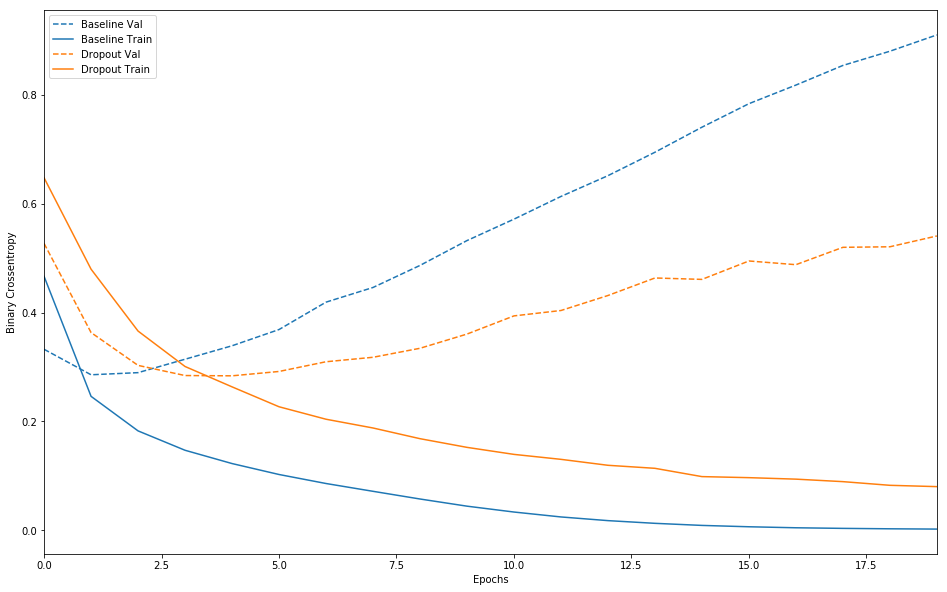

In [38]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

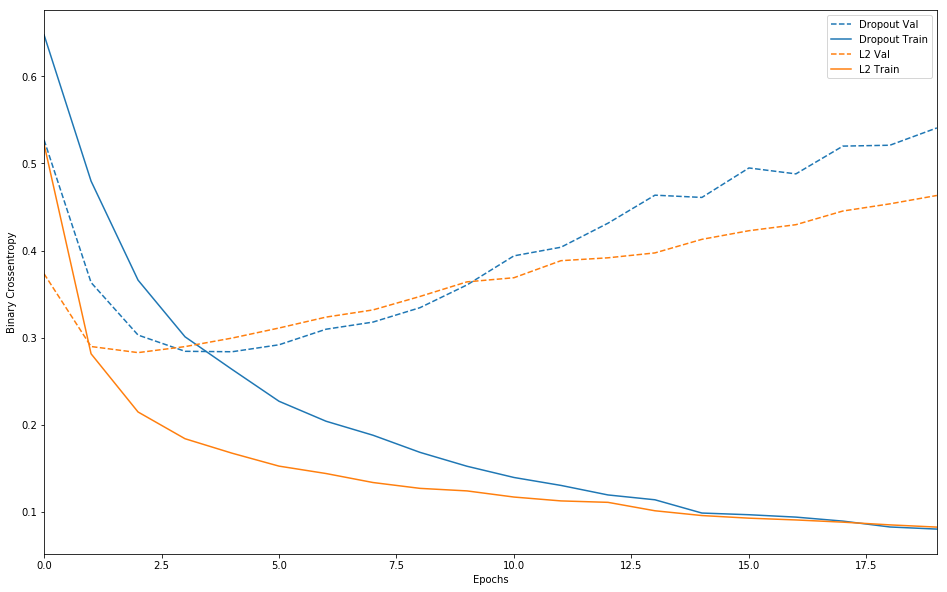

In [39]:
plot_history([('dropout', dpt_model_history), ('l2', l2_model_history)])

In [42]:
# glob
# 按照匹配符号查找路径下的文件， *，?,[]
import glob
path = glob.glob(r'*')
print(path)

['event_extraction', 'sentiment_analysis', 'text-abstract', 'text-analysis']


In [43]:
pathi = glob.iglob(r'*')
# iglob 生成的是迭代器
print(pathi)

<generator object _iglob at 0x000002DEAEB0CF10>
